# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

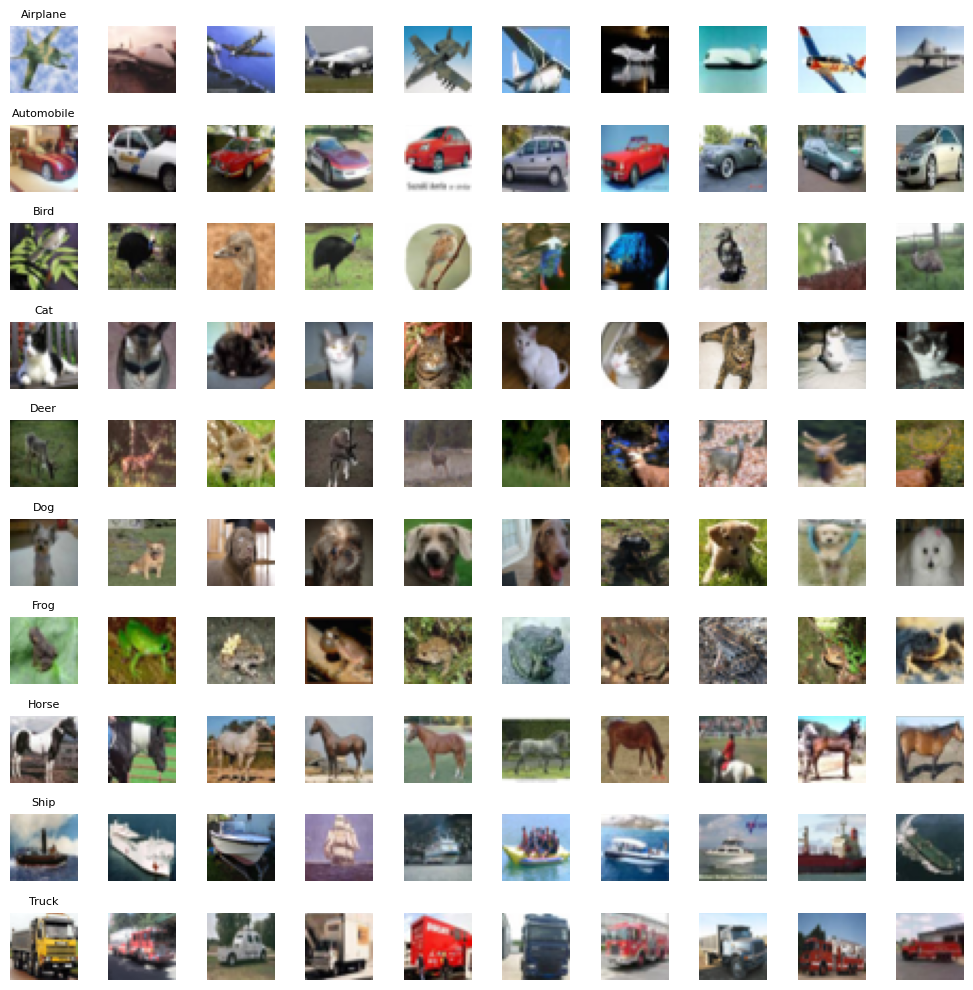

In [3]:
# CIFAR-10 class names
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]
# Step 2: Visualize the image
# Create a 10x10 plot with 10 random samples per class
plt.figure(figsize=(10, 10))  # Set the figure size

# Loop through all 10 classes
for class_index in range(10):
    # Find indices where the label matches the class index
    class_indices = np.where(y_train == class_index)[0]
    # Randomly select 10 samples from these indices
    random_indices = np.random.choice(class_indices, 10, replace=False)
    
    # Loop through these 10 samples
    for i, image_index in enumerate(random_indices):
        plt.subplot(10, 10, class_index * 10 + i + 1)  # Create a subplot
        plt.imshow(x_train[image_index])  # Show the image
        plt.axis('off')  # Turn off axis
        # Add class name for the first image in the row
        if i == 0:
            plt.title(class_names[class_index], fontsize=8)

plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

In [5]:
# Step 3: Convert labels to one-hot encoding
# `to_categorical` converts labels like [0, 1, 2, ...] to one-hot encoded form
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

In [6]:
# Print example to confirm
print("Original label:", y_train[0])  # Example: [6]
print("One-hot encoded label:", y_train_one_hot[0])  

Original label: [6]
One-hot encoded label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
# Step 4: Normalize the images
# Divide pixel values by 255 to scale them to [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

In [8]:
# Print example to confirm normalization
print("Original pixel value (before normalization):", x_train[0][0][0])  
print("Normalized pixel value:", x_train_normalized[0][0][0])  

Original pixel value (before normalization): [59 62 63]
Normalized pixel value: [0.23137255 0.24313726 0.24705882]


## Defining Deeper Architectures: VGG Models

* Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

* Stack two convolutional layers with 32 filters, each of 3 x 3. 

* Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

* For all the layers, use ReLU activation function. 

* Use same padding for the layers to ensure that the height and width of each layer output matches the input

In [9]:
from keras.backend import clear_session
clear_session()

In [10]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Define the VGG-like model for CIFAR-10
model = Sequential()

# Add two convolutional layers with 32 filters, 3x3 kernel size, ReLU activation, and same padding
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add a dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the final classification layer with 10 units (one per class) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with categorical_crossentropy loss, SGD optimizer, and accuracy as the metric
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
from tensorflow.keras.utils import to_categorical

# Example of resetting to integer-encoded labels (if needed)
# y_train, y_test = load_original_labels()

# Ensure integer-encoded labels
if len(y_train.shape) > 1 and y_train.shape[1] != 10:
    y_train = y_train.argmax(axis=-1)
    y_test = y_test.argmax(axis=-1)

# Apply one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Verify the shapes
print(f"y_train shape after correction: {y_train.shape}")
print(f"y_test shape after correction: {y_test.shape}")

y_train shape after correction: (50000, 10)
y_test shape after correction: (10000, 10)


In [12]:
from keras.backend import clear_session
from tensorflow.keras.optimizers import SGD

# Clear the session to reset the model graph
clear_session()

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=512,
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.9480 - loss: 1.7444 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 13s 129

## Define the following model (same as the one in tutorial)

* For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

* Use the input as (32,32,3). 

* The filter maps can then be flattened to provide features to the classifier. 

* Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [13]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [20]:
# Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Step 1: Define the model
# Use Sequential to stack layers
model = Sequential()

# Step 2: Add an Input layer
# The Input layer defines the shape of the input images (32x32 with 3 color channels)
model.add(Input(shape=(32, 32, 3)))

# Step 3: Add a convolutional layer
# Conv2D layer extracts features from the input images using filters
model.add(Conv2D(
    filters=32,                 # Number of filters (modest value)
    kernel_size=(3, 3),         # Size of each filter (small 3x3)
    activation='relu'           # Activation function for non-linearity
))

# Step 4: Add a max pooling layer
# MaxPooling2D reduces the spatial dimensions of feature maps, making computation efficient
model.add(MaxPooling2D(pool_size=(2, 2)))  # Pool size 2x2 reduces size by half

# Step 5: Flatten the feature maps
# Flatten converts the 2D feature maps into a 1D vector to feed into dense layers
model.add(Flatten())

# Step 6: Add a dense (fully connected) layer with 100 units
# Dense layers are used to learn high-level features
model.add(Dense(
    units=100,                 # Number of neurons in the dense layer
    activation='relu'          # Activation function for non-linearity
))

# Step 7: Add the classification output layer
# The final layer predicts the class probabilities using softmax activation
model.add(Dense(
    units=10,                  # Number of classes in CIFAR-10 dataset
    activation='softmax'       # Softmax converts outputs into probabilities
))

# Step 8: Summarize the model
# Summarize the model to view its structure
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [21]:
# Import necessary libraries
from tensorflow.keras.optimizers import SGD

# Step 1: Compile the model
# Use 'categorical_crossentropy' as the loss function because it is suitable for multi-class classification
# Use SGD (Stochastic Gradient Descent) optimizer for training
# Track the 'accuracy' metric to evaluate the model's performance
model.compile(
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    optimizer=SGD(learning_rate=0.01),  # SGD optimizer with a learning rate of 0.01
    metrics=['accuracy']  # Metric to monitor during training
)

# Step 2: Train the model
# Train the model on CIFAR-10 dataset for 50 epochs with a batch size of 512
history = model.fit(
    x_train_normalized,        # Normalized training images
    y_train_one_hot,           # One-hot encoded training labels
    epochs=50,                 # Number of epochs to train the model
    batch_size=512,            # Number of samples per batch
    validation_data=(x_test_normalized, y_test_one_hot)  # Validation data (test set)
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.1676 - loss: 2.2509 - val_accuracy: 0.2632 - val_loss: 2.1164
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.2657 - loss: 2.0841 - val_accuracy: 0.2852 - val_loss: 2.0008
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.2961 - loss: 1.9799 - val_accuracy: 0.3269 - val_loss: 1.9222
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.3267 - loss: 1.9166 - val_accuracy: 0.3276 - val_loss: 1.8918
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.3413 - loss: 1.8801 - val_accuracy: 0.3428 - val_loss: 1.8593
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.3514 - loss: 1.8493 - val_accuracy: 0.3677 - val_loss: 1.8210
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.3611 - loss: 1.8232 - val_accuracy: 0.3714 - val_loss: 1.7963
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.3717 - loss: 1.7979 - val_accuracy: 0.3747 - v

*   Plot the cross entropy loss curve and the accuracy curve

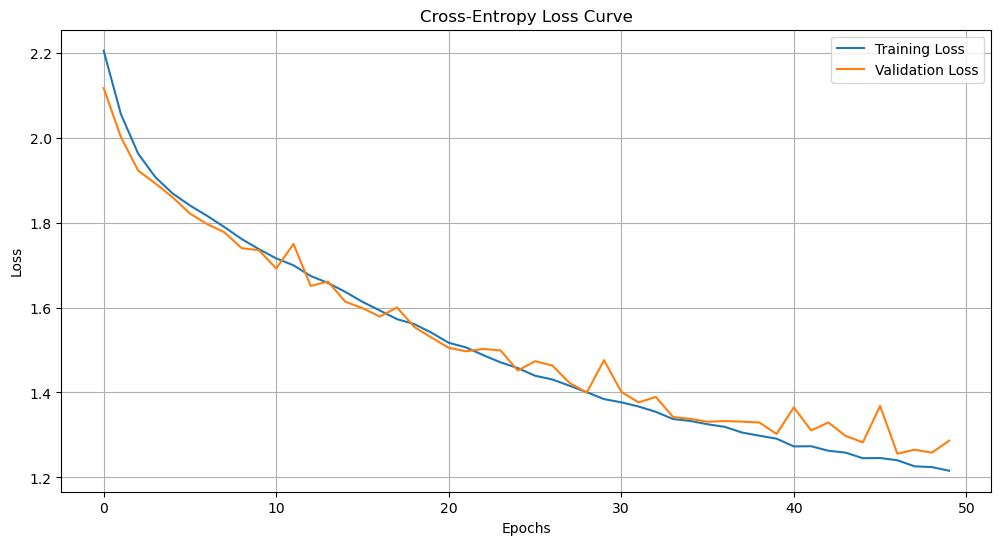

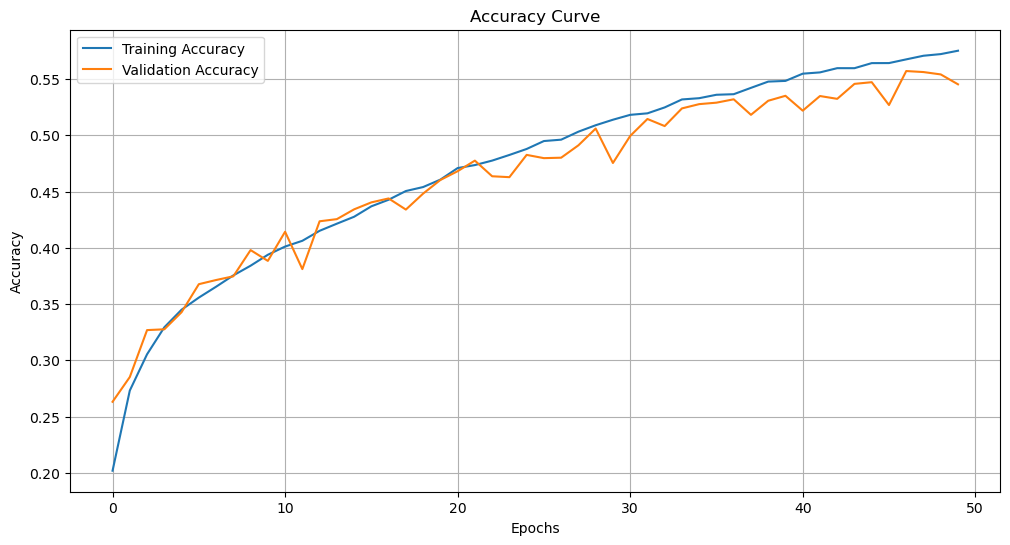

In [22]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot the accuracy curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

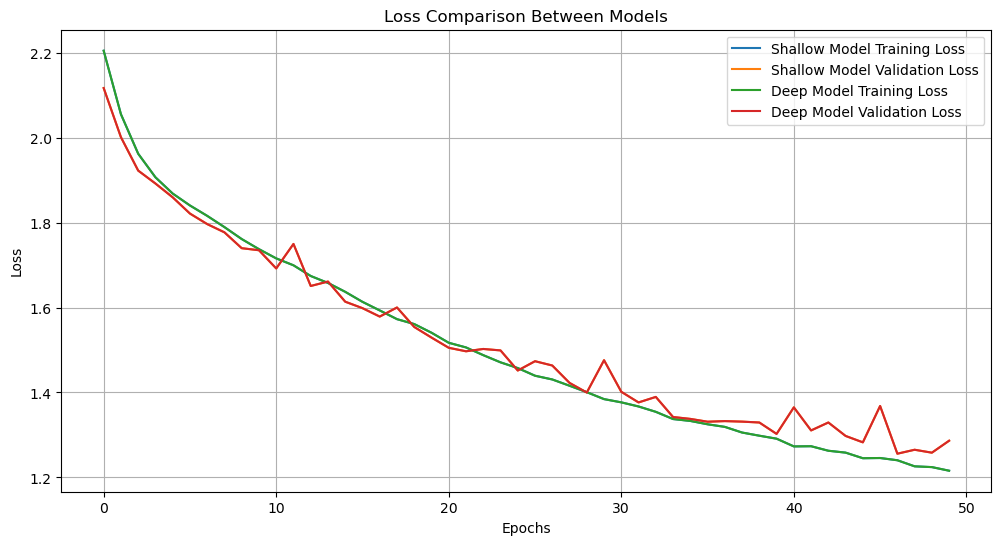

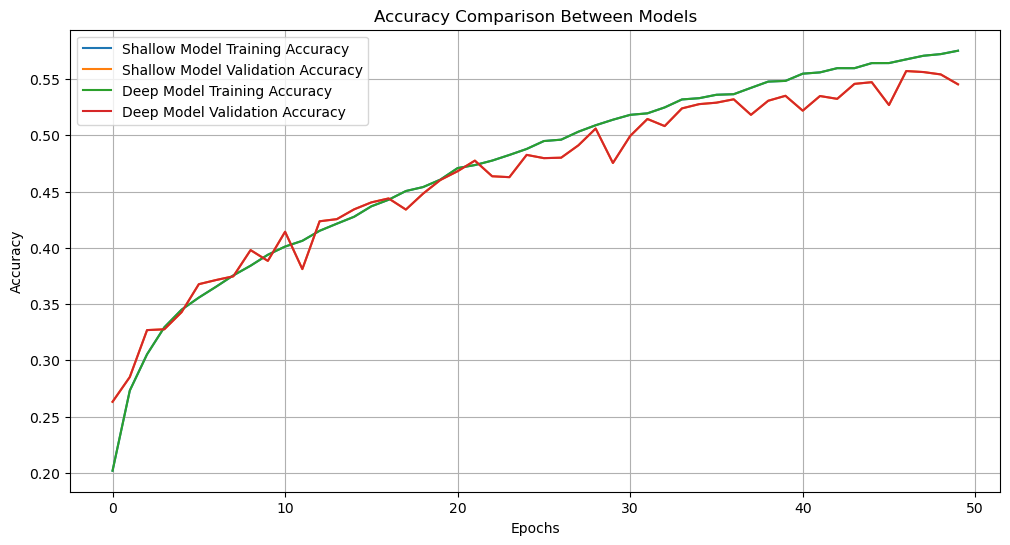

In [24]:
import matplotlib.pyplot as plt

# Assuming history_deep and history_shallow are the training histories of the two models

# Plot loss curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Shallow Model Training Loss')
plt.plot(history.history['val_loss'], label='Shallow Model Validation Loss')
plt.plot(history.history['loss'], label='Deep Model Training Loss')
plt.plot(history.history['val_loss'], label='Deep Model Validation Loss')
plt.title('Loss Comparison Between Models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot accuracy curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Shallow Model Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Shallow Model Validation Accuracy')
plt.plot(history.history['accuracy'], label='Deep Model Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Deep Model Validation Accuracy')
plt.title('Accuracy Comparison Between Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Figure size 1000x800 with 0 Axes>

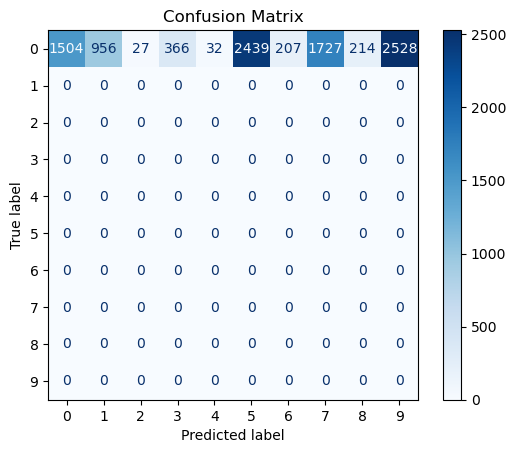

Confusion Matrix:
[[1504  956   27  366   32 2439  207 1727  214 2528]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]
The most confused classes are 0 and 9.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict the output for the test set
y_pred = model.predict(x_test)

# Convert predictions and true labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Analyze the confusions
print("Confusion Matrix:")
print(cm)

# Optional: Identify the most confused classes
most_confused = np.unravel_index(np.argmax(cm - np.eye(10) * cm.max()), cm.shape)
print(f"The most confused classes are {most_confused[0]} and {most_confused[1]}.")

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [28]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 15.04%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [30]:
from keras.backend import clear_session
clear_session()

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the VGG-like architecture
model = Sequential()

# Block 1: Two Conv layers with 64 filters and a MaxPooling layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2: Two Conv layers with 128 filters and a MaxPooling layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3: Two Conv layers with 256 filters and a MaxPooling layer
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Dense layer with 128 units
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units (classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
from keras.backend import clear_session
from tensorflow.image import resize
from tensorflow.keras.optimizers import SGD
import numpy as np

# Clear TensorFlow session
clear_session()

# Resize CIFAR-10 images to 64x64
x_train_resized = np.array([resize(image, (64, 64)).numpy() for image in x_train])
x_test_resized = np.array([resize(image, (64, 64)).numpy() for image in x_test])

# Normalize the resized images
x_train_resized = x_train_resized / 255.0
x_test_resized = x_test_resized / 255.0

# Re-compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train_resized, y_train,
    validation_data=(x_test_resized, y_test),
    epochs=10,
    batch_size=512,
    verbose=1
)

# Evaluate the model on the resized test set
test_loss, test_accuracy = model.evaluate(x_test_resized, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
 5/98 ━━━━━━━━━━━━━━━━━━━━ 8:58 6s/step - accuracy: 0.5433 - loss: 2.1206

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
